<a href="https://colab.research.google.com/github/kyaoNK/bert_nli/blob/main/CREATE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!sudo apt -y update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,573 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubu

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')

# Datasets

## JGLUE

In [20]:
# new label
def function(x):
    rte = x['label_rte']
    sts = x['label_sts']
    if rte == 'entailment' :
        if sts >= 4.5 :
            new_label = '正解'
        elif sts >= 3.5 :
            new_label = '異なる修飾'
        elif sts >= 2.5 :
            new_label = '欠如'
        else :
            new_label = '不十分'

    elif rte == 'neutral' :
        if sts >= 4.5 :
            new_label = '正解'
        elif sts >= 1.5 :
            new_label = '無関係'
        else :
            new_label = 'ドメイン外'
            
    elif rte == 'contradiction' :
        if sts >= 3.5 :
            new_label = '異なる修飾'
        else :
            new_label = '矛盾'

    return pd.Series( data=[ x['label_rte'] , x['label_sts'] , new_label ] )

In [14]:
import pandas as pd

JGLUE_DIR = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/JGLUE/datasets/'
RTE_DIR = JGLUE_DIR + 'jnli-v1.1/'
STS_DIR = JGLUE_DIR + 'jsts-v1.1/'
JGLUE_FILENAME = { 'train' : 'train-v1.1.json' , 'valid' : 'valid-v1.1.json' }
JGLUE_COLS = [ 'yjcaptions_id' , 'sentence1' , 'sentence2' , 'label' ]

# RTE
COLUMNS = [ 'id', 'sentenceA' , 'sentenceB' , 'label_rte' ]

jglue_rte_train_df = pd.read_json( RTE_DIR + JGLUE_FILENAME['train'] , lines=True , encoding='utf-8' )
jglue_rte_train_df = jglue_rte_train_df.loc[ : , JGLUE_COLS ]
jglue_rte_train_df.columns = COLUMNS

jglue_rte_valid_df = pd.read_json( RTE_DIR + JGLUE_FILENAME['valid'] , lines=True , encoding='utf-8' )
jglue_rte_valid_df = jglue_rte_valid_df.loc[ : , JGLUE_COLS ]
jglue_rte_valid_df.columns = COLUMNS

# STS
COLUMNS = [ 'id', 'sentenceA' , 'sentenceB' , 'label_sts' ]

jglue_sts_train_df = pd.read_json( STS_DIR + JGLUE_FILENAME['train'] , lines=True , encoding='utf-8' )
jglue_sts_train_df = jglue_sts_train_df.loc[ : , JGLUE_COLS ]
jglue_sts_train_df.columns = COLUMNS

jglue_sts_valid_df = pd.read_json( STS_DIR + JGLUE_FILENAME['valid'] , lines=True , encoding='utf-8' )
jglue_sts_valid_df = jglue_sts_valid_df.loc[ : , JGLUE_COLS ]
jglue_sts_valid_df.columns = COLUMNS

# merge

jglue_rte_df = pd.concat( [ jglue_rte_train_df, jglue_rte_valid_df ] , axis=0 )
jglue_sts_df = pd.concat( [ jglue_sts_train_df, jglue_sts_train_df ] , axis=0 )
jglue_df = pd.merge(jglue_rte_df, jglue_sts_df[['id', 'label_sts']], on='id')

jglue_df

,id,sentenceA,sentenceB,label_rte,label_sts
0,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8
1,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8
2,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0
3,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0
4,100282-104568-104569,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.6
...,...,...,...,...,...
16055,99086-103342-g1967,草原をシマウマの達が走っています。,草原にシマウマたちが止まっています。,contradiction,2.2
16056,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8
16057,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8
16058,99856-104139-104143,広場にプロペラ飛行機のオブジェが飾られています。,大きなプロペラ機のオブジェがあります。,neutral,3.4


In [23]:
jglue_label_df = jglue_df[[ 'label_rte' , 'label_sts' ]]

# jglue_label_df 

jglue_label_df = jglue_label_df.apply(function, axis=1)
jglue_label_df.columns = [ 'label_rte' , 'label_sts' , 'label_detail_asag']

jglue_label_df

,label_rte,label_sts,label_detail_asag
0,neutral,3.8,無関係
1,neutral,3.8,無関係
2,neutral,4.0,無関係
3,neutral,4.0,無関係
4,neutral,2.6,無関係
...,...,...,...
16055,contradiction,2.2,矛盾
16056,neutral,2.8,無関係
16057,neutral,2.8,無関係
16058,neutral,3.4,無関係


In [24]:
# def print_freq(label_df):
#     s = label_df
#     freq = s.value_counts()
#     print(freq)

# print_freq(jglue_label_df[0])
# print_freq(jglue_label_df[1])
# print_freq(jglue_label_df[2])

                0.0   0.2   0.4  0.6    0.8    1.0    1.2    1.4    1.6  \
entailment      0.0   0.0   0.0  0.0    0.0    0.0    0.0    0.0    4.0   
neutral        14.0  24.0  44.0  0.0  136.0  220.0  304.0  276.0  298.0   
contradiction  36.0  58.0  68.0  0.0  196.0  168.0  264.0  210.0  222.0   

                 1.8  ...     3.2    3.4    3.6    3.8    4.0    4.2    4.4  \
entailment      12.0  ...   156.0  226.0  236.0  296.0  290.0  286.0  198.0   
neutral        480.0  ...  1006.0  822.0  748.0  730.0  466.0  196.0   84.0   
contradiction  266.0  ...   206.0  132.0  102.0   46.0    8.0    0.0    2.0   

                 4.6    4.8    5.0  
entailment     248.0  142.0  170.0  
neutral         26.0    6.0    0.0  
contradiction    0.0    0.0    0.0  

[3 rows x 26 columns]


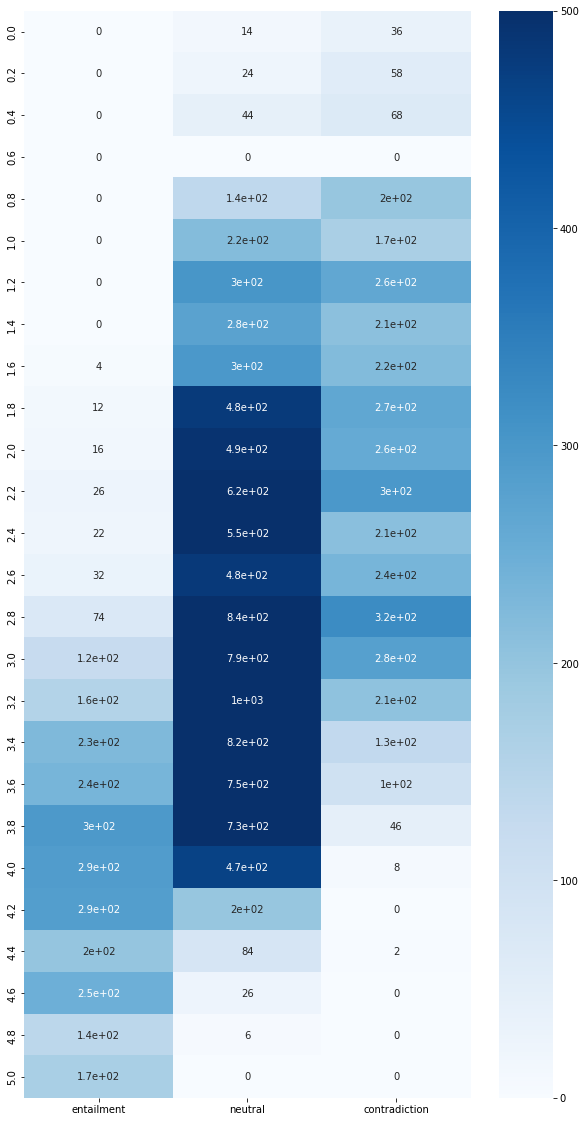

In [27]:
#@title heat map

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

s = jglue_label_df[ [ 'label_rte' , 'label_sts' ] ]

freq = s.value_counts(sort=True, ascending=True, dropna=False)
freq_df = pd.DataFrame(freq)
freq_df.columns = ['freq']
freq_df = freq_df.sort_index()

sts_list = np.round(np.arange(0, 5.2, 0.2) , 2).tolist()
sts_range = sts_list * 3

rte_range = ['entailment']*len(sts_list)
rte_range.extend( ['neutral']*len(sts_list))
rte_range.extend( ['contradiction']*len(sts_list))

df = pd.DataFrame(index=[rte_range, sts_range], columns=['freq'])
df.fillna(0, inplace=True)
df.update(freq_df)
df

freq_2d = [
    df.loc['entailment'].T.values.tolist()[0],
    df.loc['neutral'].T.values.tolist()[0],
    df.loc['contradiction'].T.values.tolist()[0]
]

df_ = pd.DataFrame(data=freq_2d, index=['entailment', 'neutral', 'contradiction'], columns=np.round(np.arange(0, 5.2, 0.2),2))
# print(df_)

df_ = df_.T
plt.figure(figsize=(10, 20))
sns.heatmap(df_, cmap='Blues', vmax=500, annot=True, )

In [28]:
#@title write & merge new label
import csv

jglue_label_df = jglue_label_df.rename(columns={2:'label_detail_asag'})
jglue_df_asag = jglue_df.join([jglue_label_df['label_detail_asag']])
jglue_df_asag.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jglue.csv')
jglue_df_asag

,id,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
1,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
2,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
3,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
4,100282-104568-104569,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.6,無関係
...,...,...,...,...,...,...
16055,99086-103342-g1967,草原をシマウマの達が走っています。,草原にシマウマたちが止まっています。,contradiction,2.2,矛盾
16056,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8,無関係
16057,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8,無関係
16058,99856-104139-104143,広場にプロペラ飛行機のオブジェが飾られています。,大きなプロペラ機のオブジェがあります。,neutral,3.4,無関係


## JSICK

In [29]:
import pandas as pd
import csv

def tsv2csv (tsv_filepath) :
    with open(tsv_filepath, 'r') as tsv_f:
        tsv = csv.reader(tsv_f, delimiter = '\t')
        csv_filepath = tsv_filepath[:-4] + '.csv'
        with open(csv_filepath, 'w', newline='\n') as csv_f:
            writer = csv.writer(csv_f, delimiter=",")
            for row in tsv:
                writer.writerow(row)
            return csv_filepath

JSICK_FILE = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/JSICK/jsick/jsick-all-annotations.tsv'
JSICK_FILENAME = { 'train' : 'train.tsv' , 'valid' : 'test.tsv' }
JSICK_COLS = [ 'sentence_A_Ja' , 'sentence_B_Ja' , 'entailment_label_Ja' , 'relatedness_score_Ja' ]
COLUMNS = [ 'sentenceA' , 'sentenceB' , 'label_rte' , 'label_sts' ]

jsick_filepath = tsv2csv(JSICK_FILE)
jsick_df = pd.read_csv( jsick_filepath , encoding='utf-8' , header=0 )
jsick_df = jsick_df.loc[ : , JSICK_COLS ]
jsick_df.columns = COLUMNS

jsick_df['label_sts'] = (( jsick_df['label_sts'] / 4) * 5 ) -1 
jsick_df

,sentenceA,sentenceB,label_rte,label_sts
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125
...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250


In [33]:
#@title NEW LABEL
jsick_label_df = jsick_df[[ 'label_rte' , 'label_sts' ]]

jsick_label_df = jsick_label_df.apply(function, axis=1)
jsick_label_df.columns = [ 'label_rte' , 'label_sts' , 'label_detail_asag']
jsick_label_df

,label_rte,label_sts,label_detail_asag
0,neutral,3.625,無関係
1,contradiction,1.875,矛盾
2,entailment,4.375,異なる修飾
3,contradiction,1.875,矛盾
4,neutral,3.125,無関係
...,...,...,...
9922,neutral,0.250,ドメイン外
9923,neutral,0.250,ドメイン外
9924,neutral,0.250,ドメイン外
9925,neutral,0.250,ドメイン外


In [31]:
# print_freq(jsick_label_df[0])
# print_freq(jsick_label_df[1])
# print_freq(jsick_label_df[2])

In [35]:
jsick_label_df = jsick_label_df.rename(columns={2:'label_detail_asag'})
jsick_df_asag = jsick_df.join([jsick_label_df['label_detail_asag']])
jsick_df_asag

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625,無関係
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875,矛盾
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375,異なる修飾
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875,矛盾
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125,無関係
...,...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250,ドメイン外
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250,ドメイン外
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250,ドメイン外
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250,ドメイン外


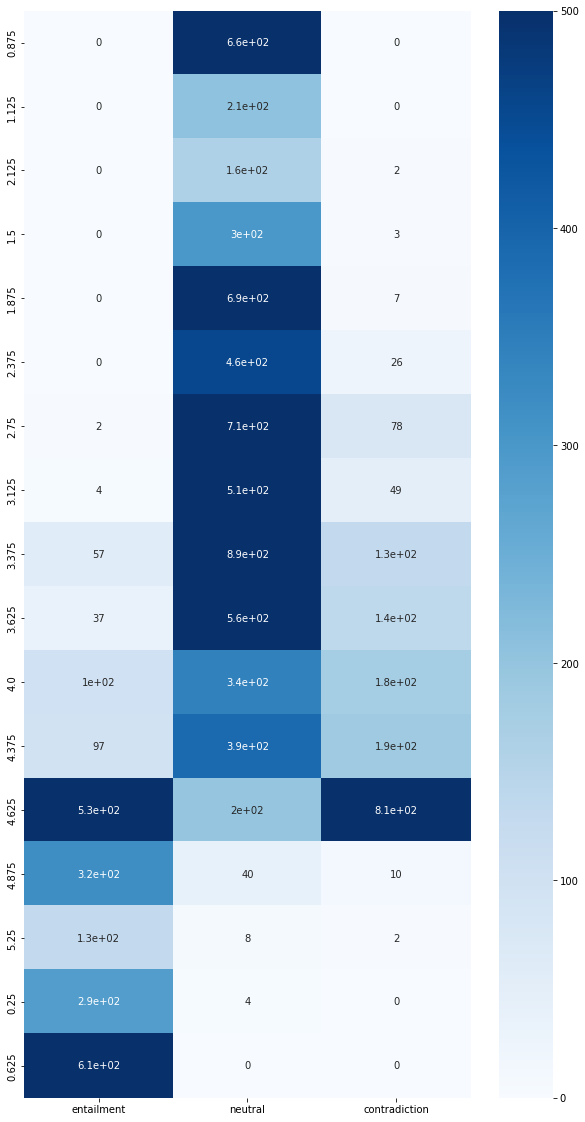

In [40]:
# heat map

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

s = jsick_label_df[['label_rte' , 'label_sts']]
freq = s.value_counts()

freq = s.value_counts(sort=True, ascending=True, dropna=False)
freq_df = pd.DataFrame(freq)
freq_df.columns = ['freq']
freq_df = freq_df.sort_index()
sts_list = freq_df.index.get_level_values(1).tolist()

sts_list = list(set(sts_list))
sts_range = sts_list * 3

rte_range = ['entailment']* (len(sts_list))
rte_range.extend( ['neutral']*(len(sts_list)) )
rte_range.extend( ['contradiction']*(len(sts_list)) )

df = pd.DataFrame(index=[rte_range, sts_range], columns=['freq'])
df.fillna(0, inplace=True)
df.update(freq_df)
df = df.sort_index()

freq_2d = [
    df.loc['entailment'].T.values.tolist()[0],
    df.loc['neutral'].T.values.tolist()[0],
    df.loc['contradiction'].T.values.tolist()[0]
]

df_ = pd.DataFrame(data=freq_2d, index=['entailment', 'neutral', 'contradiction'], columns=sts_list)
# print(df)
df_ = df_.T
plt.figure(figsize=(10, 20))
sns.heatmap(df_, cmap='Blues', vmax=500, annot=True, )

In [41]:
#@title write & merge new label
import csv

jsick_label_df = jsick_label_df.rename(columns={2:'label_detail_asag'})
jsick_df_asag = jsick_df.join([jsick_label_df['label_detail_asag']])
jsick_df_asag.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jsick.csv')
jsick_df_asag

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625,無関係
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875,矛盾
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375,異なる修飾
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875,矛盾
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125,無関係
...,...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250,ドメイン外
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250,ドメイン外
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250,ドメイン外
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250,ドメイン外


## Merge JGLUE and JSICK

In [42]:
jglue_jsick_df = pd.concat([jglue_df_asag[jglue_df_asag.columns[jglue_df_asag.columns != 'id']] , jsick_df_asag], axis=0, ignore_index=True)
jglue_jsick_df.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jglue_jsick.csv')
jglue_jsick_df

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.80,無関係
1,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.80,無関係
2,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.00,無関係
3,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.00,無関係
4,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.60,無関係
...,...,...,...,...,...
25982,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.25,ドメイン外
25983,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.25,ドメイン外
25984,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.25,ドメイン外
25985,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.25,ドメイン外


## Tutoring Data

In [85]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
import pandas as pd
import glob
from natsort import natsorted

TUTORING_DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/TutoringData/annotation_data/'
annotation1_dir = TUTORING_DATA_DIR + 'annotation1/'
tutoring_files = natsorted(glob.glob(annotation1_dir + '*.csv'))

TUTORING_COLUMNS_A = ['番号' , '発問' , '模範解答' , 'タイプ' , '解答者の解答' , '評価A']
TUTORING_COLUMNS_B = ['番号' , '発問' , '模範解答' , 'タイプ' , '解答者の解答' , '評価B']
TUTORING_COLUMNS_C = ['番号' , '発問' , '模範解答' , 'タイプ' , '解答者の解答' , '評価C']

tutoring_df = pd.read_csv(tutoring_files[0] , skiprows=1 , usecols=range(0,6) , dtype=object )
tutoring_df.columns = TUTORING_COLUMNS_A

for t_f in tutoring_files[1:] :
    df_ = pd.read_csv(t_f , skiprows=1 , usecols=range(0,6))
    df_.columns = TUTORING_COLUMNS_A
    tutoring_df = pd.concat( [ tutoring_df , df_ ] , axis=0 , ignore_index=True )

for annotation in [ { 'path' : TUTORING_DATA_DIR + 'annotation2/' , 'cols' : TUTORING_COLUMNS_B } , { 'path' : TUTORING_DATA_DIR + 'annotation3/' , 'cols' : TUTORING_COLUMNS_C } ]:
    t_files = natsorted(glob.glob(annotation['path'] + '*.csv'))
    df_ = pd.read_csv(t_files[0] , skiprows=1 , usecols=range(0,6))
    df_.columns = annotation['cols']
    for t_f in t_files[1:]:
        df_2 = pd.read_csv(t_f , skiprows=1 , usecols=range(0,6))
        df_2.columns = annotation['cols']
        df_ = pd.concat( [ df_ , df_2 ] , axis=0 , ignore_index=True)

    tutoring_df = pd.concat( [ tutoring_df , df_[annotation['cols'][5]] ] , axis=1)

total_eval_df = pd.DataFrame(tutoring_df[['評価A' , '評価B' , '評価C']].mode(axis=1)[0])
total_eval_df.columns = ['評価']
tutoring_df = pd.concat([ tutoring_df , total_eval_df ] , axis=1)

def func(x):
    a = x[0]
    b = x[1]
    c = x[2]
    if a != b and a != c and b != c :
        min = 8
        eval = ''
        for i in [a , b , c] : 
            # print(i[-1])
            if min > int(i[-1]):
                min = int(i[-1])
                eval = i
        return pd.Series( data=[ x[0] , x[1] , x[2] , eval] )
    else :
        return pd.Series( data=[ x[0] , x[1] , x[2] , x[3]] )

tutoring_df[['評価A' , '評価B' , '評価C' , '評価']] = tutoring_df[['評価A' , '評価B' , '評価C' , '評価']].apply(func, axis=1)
tutoring_df[['評価A' , '評価B' , '評価C' , '評価']] = tutoring_df[['評価A' , '評価B' , '評価C' , '評価']].replace(['ドメイン外 : 1' , '無関係 : 2' , '不十分 : 3' , '矛盾 : 4' , '欠如 : 5' , '異なる修飾 : 6' , '正解 : 7'] , ['ドメイン外' , '無関係' , '不十分' , '矛盾' , '欠如' , '異なる修飾' , '正解'])

tua_tutoring_df = tutoring_df[['模範解答' , '解答者の解答' , '評価']]
tua_tutoring_df.columns = ['sentenceA' , 'sentenceB' , 'label_detail_asag']
tua_df = pd.concat( [jglue_jsick_df, tua_tutoring_df], axis=0, ignore_index=True)
tua_df.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_tua.csv')

tuq_tutoring_df = tutoring_df[['発問' , '解答者の解答' , '評価']]
tuq_tutoring_df.columns = ['sentenceA' , 'sentenceB' , 'label_detail_asag']
tuq_df = pd.concat( [jglue_jsick_df, tua_tutoring_df], axis=0, ignore_index=True)
tuq_df.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_tuq.csv')

# s = tutoring_df['評価']
# freq = s.value_counts()
# print(freq)

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
1,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
2,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
3,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
4,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.6,無関係
...,...,...,...,...,...
26432,名義尺度と順序尺度をまとめてカテゴリ型データという,名義尺度と順序尺度をまとめてカテゴリデータと呼ぶ,NaN,NaN,正解
26433,分割表やマリメッコチャートを用いる,モザイク図やマリメッコチャートなどが用いられる,NaN,NaN,欠如
26434,統計解析ソフトウェアであるRやTableau社が提供しているTableauDesktopを用いる,ソフトウェアRなど,NaN,NaN,欠如
26435,数値で表現されていても表現されていても量的データと同様の演算や可視化を行うことができない,わかりませんでした,NaN,NaN,ドメイン外
